##Define Function <br>
$I(Q)=\frac G {Q^s} exp(\frac{-Q^2 Rg^2}{3-s})$ &emsp; $Q>=q_0 $<br>
$I(Q)=\frac D {Q^d}$ &emsp;&emsp;&emsp;&emsp; $ Q<=q_0 $ <br>
Continuity conditions<br>
$ q_0 = \frac 1 R_g [\frac{(d-s)(3-s)} 2]^{\frac1 2}$ <br>
$ D = G exp(\frac{-q_0^2 Rg^2}{3-s}) q_0^{d-s} $

In [29]:
%matplotlib notebook
from scipy import optimize as opt
import scipy.special as sf
import matplotlib.pyplot as plt
import numpy as np

def piecewise_GP(x,G,s,Rg,d,b):
    q0 = (1/Rg)*((d-s)*(3-s)/2)**(1/2)
    D = G*np.exp(-q0**2*Rg**2/(3-s))*q0**(d-s)
    return np.piecewise(x, [x <= q0, x >= q0],
                        [lambda x:(G/x**s)*np.exp(-1*(x**2)*(Rg**2)/(3-s)), 
                         lambda x:D/(x**d)])+b


#Restrict parameter values ((min val), (max val)) q0,G,s,Rg,P,d,b
lims = ((0,0,0,0,0),(np.inf,2,300,4,100)) 

#Fitting information
def chisq(x,y,sig,fited_params):
    return sum((y-piecewise_GP(x,*fited_params))**2/sig**2)

def dof(data,fited_params):
    return len(data)-len(fited_params)

def red_chisq(chisq,dof):
    return chisq/dof

def incert(cov_mat):
    return np.sqrt(np.diag(cov_mat))

<IPython.core.display.Javascript object>


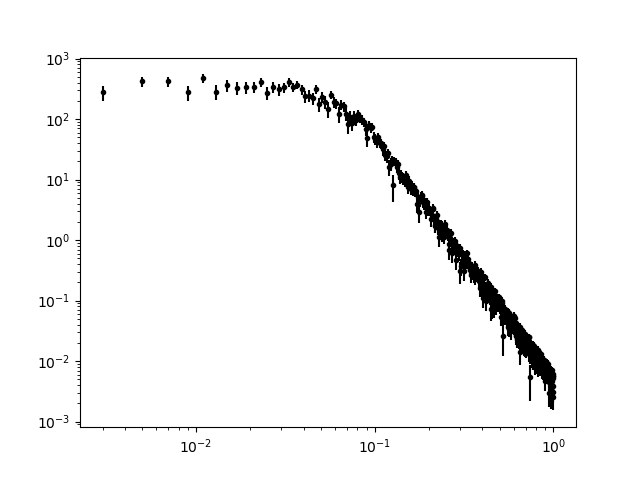

In [36]:
#Test data
xd = np.linspace(0.003,1,500) 
yd = piecewise_GP(xd,400,0,25,4,1e-5)
sig = yd*0.2
y = yd + np.random.randn(len(yd))*sig

plt.figure()
plt.errorbar(xd,y,yerr=sig,fmt='k.')
plt.yscale('log')
plt.xscale('log')

fitted params [3.76576892e+02 5.46315124e-17 2.46303877e+01 4.00000000e+00
 1.28475126e-60] 
 Uncertainties [8.37652510e+01 5.66201928e-02 8.71964586e-01 2.24252744e-02
 2.51677390e-04]


<IPython.core.display.Javascript object>


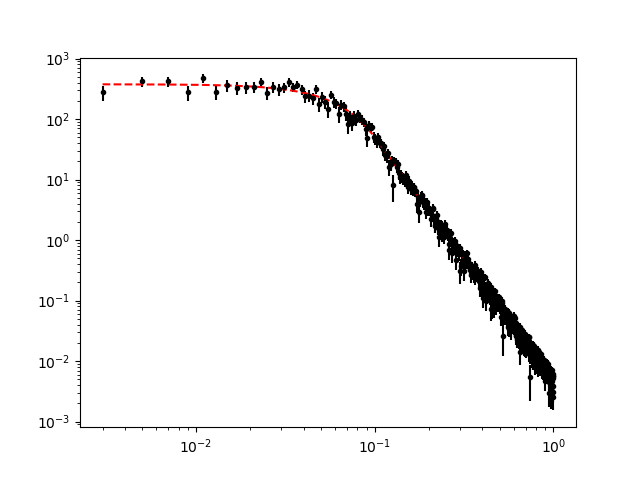

Chi squared 473.74943263093496 Degrees of freedom 495 Reduced chisq 0.9570695608705757 Probability 0.7466659964623684


In [42]:
#Fit data without initializing params
p,cov = opt.curve_fit(piecewise_GP,xd,y,sigma=sig,bounds=lims) #fitted params, cov matrix
print('fitted params',p,'\n','Uncertainties',incert(cov))

plt.figure()
plt.errorbar(xd,y,yerr=sig,fmt='k.')
plt.yscale('log')
plt.xscale('log')
plt.loglog(xd,piecewise_GP(xd,*p),'r--')

a=chisq(xd,y,sig,p)
b=dof(y,p)
c=sf.gammaincc(b*0.5,a*0.5)
print('Chi squared',a,'Degrees of freedom', b,'Reduced chisq', red_chisq(a,b),'Probability',c)

<IPython.core.display.Javascript object>


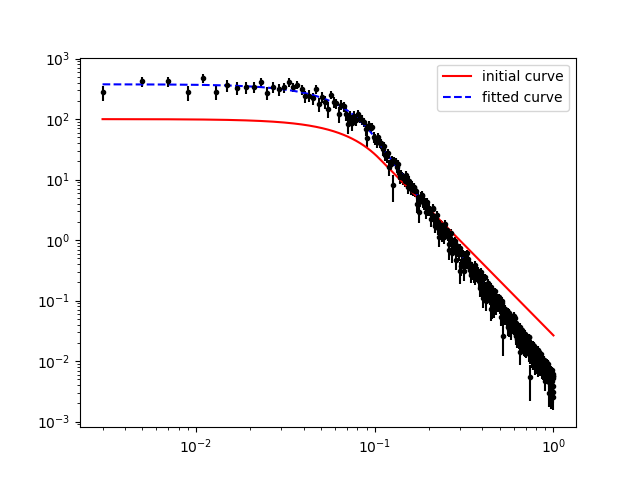

Fitted params [3.76576891e+02 2.04234152e-10 2.46303877e+01 4.00000000e+00
 4.20618549e-36] 
 Uncertainties [8.37652522e+01 5.66201937e-02 8.71964605e-01 2.24252745e-02
 2.51677391e-04]
Chi squared 473.74943265407086 Degrees of reedom 495 Reduced chisq 0.9570695609173149 Probability 0.7466659962200934


In [41]:
#Fit data initializing params
init_vals = [100,0,20,3,1e-7]
p_init,cov_init = opt.curve_fit(piecewise_GP,xd,y,sigma=sig,p0=init_vals,bounds=lims)

plt.figure()
plt.errorbar(xd,y,yerr=sig,fmt='k.')
plt.plot(xd,piecewise_GP(xd,*init_vals),'r-',label='initial curve')
plt.yscale('log')
plt.xscale('log')
plt.loglog(xd,piecewise_GP(xd,*p_init),'b--',label='fitted curve')
plt.legend()

print('Fitted params',p_init,'\n','Uncertainties',incert(cov_init))
a = chisq(xd,y,sig,p_init)
b = dof(y,p_init)
c = sf.gammaincc(b*0.5,a*0.5)
print('Chi squared',a,'Degrees of reedom', b,'Reduced chisq', red_chisq(a,b),'Probability',c)